# Introduction to Haar Cascade Classifiers for Object Detection

The **Haar Cascade Classifier** is a machine learning-based approach to object detection, particularly effective for real-time face detection. Introduced by **Paul Viola and Michael Jones** in their 2001 paper:

> *"Rapid Object Detection using a Boosted Cascade of Simple Features"*, CVPR 2001.

This method remains widely used due to its efficiency and simplicity.

---

## Motivation

The core idea is to detect objects by evaluating the presence of **simple rectangular features** (resembling Haar wavelets) over subregions of an image. These features can effectively capture edges, lines, and other patterns that characterize objects such as faces.

---

## Algorithm Overview

### 1. Haar-like Features

Haar features are rectangular patterns that capture contrast between regions. Common types include:

- **Edge features**: two-rectangle patterns
- **Line features**: three-rectangle patterns
- **Center-surround features**: four-rectangle patterns

A Haar feature's value is computed as the **difference of sums of pixel intensities** between adjacent regions.

![Haar-like Features](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/VJ_featureTypes.svg/2880px-VJ_featureTypes.svg.png)
*Source: [Wikipedia](https://en.wikipedia.org/wiki/Haar-like_feature)*

### 2. Integral Image

To compute features efficiently at any scale and location, the algorithm uses an **integral image** representation:

$$
I_{\text{int}}(x, y) = \sum_{x' \leq x, y' \leq y} I(x', y')
$$

This allows computing the sum of pixel values in any rectangular region in constant time.

### 3. Training via AdaBoost

- A large set of Haar features is generated from training data.
- The **AdaBoost algorithm** selects the most informative features and builds a strong classifier from a set of weak learners (e.g., simple decision stumps).
- Each weak classifier is based on a single Haar feature.

### 4. Cascade of Classifiers

Rather than evaluating every feature at every position, a **cascade structure** is used:

- Early stages quickly discard non-object regions using simple classifiers.
- Only promising regions are passed to deeper, more complex stages.
- This structure dramatically increases speed.

![Cascade Classifier Structure](https://docs.opencv.org/4.x/haar.png)
*Source: [OpenCV](https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html)*

---

---

## Advantages

- Fast and efficient due to the cascade and integral image.
- Good real-time performance on CPU.
- Effective for detecting well-defined, rigid objects (e.g., faces, eyes).

---

## Limitations

- Sensitive to changes in scale, pose, and illumination.
- Requires separate models for different object orientations.
- Tends to perform poorly in cluttered or uncontrolled environments.

---

## Typical Applications

- **Face detection** (frontal and profile)
- Eye, mouth, and nose detection
- Vehicle detection
- Pedestrian detection (to a lesser extent)

---

## Reference

Viola, P., & Jones, M. (2001). *Rapid Object Detection using a Boosted Cascade of Simple Features*.
Conference on Computer Vision and Pattern Recognition (CVPR).
[PDF Link](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf)

---

## Pre-trained Classifiers in OpenCV

OpenCV provides a set of pre-trained Haar cascade XML files for various objects, such as:

- `haarcascade_frontalface_default.xml`
- `haarcascade_eye.xml`
- `haarcascade_fullbody.xml`

These can be loaded using:

```python
cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


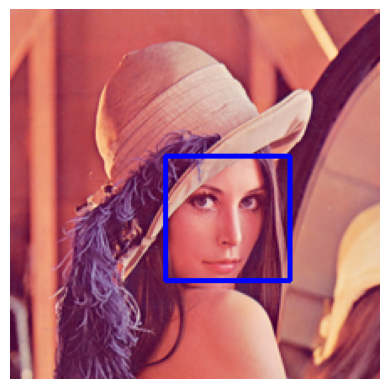

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar el clasificador preentrenado para rostros
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Cargar una imagen de prueba
image_path = 'lena.png'  # Cambia esto por la ruta de tu imagen
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar rostros en la imagen
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Dibujar rectángulos alrededor de los rostros detectados
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convertir la imagen a RGB para visualizarla en Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los rostros detectados
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Introduction to Histogram of Oriented Gradients (HOG)

The **Histogram of Oriented Gradients (HOG)** is a feature descriptor used in computer vision and image processing for object detection. It is particularly effective for detecting objects characterized by strong edge features, such as human figures.





This method was introduced by **Navneet Dalal and Bill Triggs** in their paper:

> *"Histograms of Oriented Gradients for Human Detection"*, CVPR 2005.

---

## Motivation

The key idea is:

> "Local object appearance and shape can be well described by the distribution of local intensity gradients or edge directions."

By focusing on gradients rather than raw pixel values, HOG descriptors are robust to illumination and shadowing variations.

---

## Algorithm Overview

### 1. Grayscale Conversion (Optional Normalization)

- Convert the input image to grayscale.
- Optionally apply local contrast normalization.


---

### 2. Gradient Computation

Compute horizontal and vertical gradients using filters:

$$
G_x = I(x+1, y) - I(x-1, y)
$$

$$
G_y = I(x, y+1) - I(x, y-1)
$$

From these, compute the gradient **magnitude** and **orientation**:

$$
\|G\| = \sqrt{G_x^2 + G_y^2}
$$

$$
\theta = \arctan\left(\frac{G_y}{G_x}\right)
$$


![Gradient Magnitude and Orientation](https://scikit-image.org/docs/stable/_images/sphx_glr_plot_hog_001.png)

*Source: [scikit-image](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html)*
---

### 3. Cell Histogram Generation

- Divide the image into small spatial regions called **cells** (e.g., 8×8 pixels).
- Within each cell, build a histogram of gradient orientations (typically 9 bins from 0° to 180° or 0° to 360°).
- Each pixel contributes based on its gradient magnitude and orientation.


---

### 4. Block Normalization

- Group adjacent cells into overlapping **blocks** (e.g., 2×2 cells).
- Concatenate the histograms within each block.
- Normalize the resulting vector to achieve contrast invariance:

$$
\mathbf{v}_{\text{norm}} = \frac{\mathbf{v}}{\sqrt{\|\mathbf{v}\|^2 + \varepsilon^2}}
$$


---

### 5. Final Feature Vector

- Concatenate all block vectors into a single high-dimensional feature vector.
- This vector represents the HOG descriptor of the image or detection window.


---

## Advantages

- Robust to illumination and shadowing variations.
- Focuses on the structural features of objects (shapes, contours).
- Particularly effective for human detection tasks.

---

## Typical Applications

HOG is most commonly applied in conjunction with a **Support Vector Machine (SVM)** classifier for detecting pedestrians in static images. It has also been used for detecting other types of objects, though its performance can be limited for non-rigid or highly textured targets.

---

## Reference

Dalal, N., & Triggs, B. (2005). *Histograms of Oriented Gradients for Human Detection*.
Conference on Computer Vision and Pattern Recognition (CVPR).
[PDF Link](https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf)

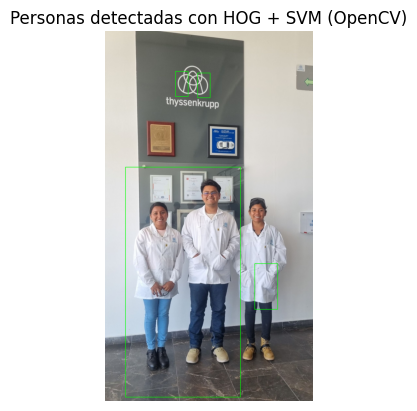

In [5]:
import cv2
import matplotlib.pyplot as plt

# Crear el detector HOG + SVM de personas
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Cargar imagen
image_path = 'img_1.png'  # Usa una imagen con personas
image = cv2.imread(image_path)

# Detectar personas
boxes, weights = hog.detectMultiScale(image, winStride=(8, 8), padding=(16, 16), scale=1.05)

# Dibujar las detecciones
for (x, y, w, h) in boxes:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Mostrar imagen
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Personas detectadas con HOG + SVM (OpenCV)")
plt.show()


# Introduction to You Only Look Once (YOLO)

**You Only Look Once (YOLO)** is a state-of-the-art real-time object detection system that processes images **in a single forward pass** through a neural network. Unlike traditional methods like HOG, YOLO achieves end-to-end detection with superior speed and accuracy.

Introduced by **Joseph Redmon et al.** in:
> *"You Only Look Once: Unified, Real-Time Object Detection"*, CVPR 2016.

Modern versions (YOLOv5/YOLOv8) are maintained by [Ultralytics](https://ultralytics.com).

---

## Motivation

Key philosophy:

> "Frame object detection as a regression problem to spatially separated bounding boxes and associated class probabilities."

Advantages over HOG:
- Processes entire image at once (global context)
- Runs at 45-150 FPS (real-time capability)
- Learns features automatically through deep learning

---

## Algorithm Overview

### 1. Grid Division
- Image divided into $S \times S$ grid (e.g., 13×13)
- Each grid cell predicts $B$ bounding boxes

---

### 2. Bounding Box Prediction
Each prediction contains:
- Box coordinates $(x, y, w, h)$
- Confidence score: $\text{Pr(object)} \times \text{IoU}_{\text{pred}}^{\text{truth}}$
- Class probabilities: $\text{Pr(class}_i|\text{object)}$

$$
\text{Output Tensor} = S \times S \times [B \times (5 + C)]
$$
*(C = number of classes)*

---

### 3. Non-Maximum Suppression (NMS)
1. Filters boxes by confidence threshold
2. Eliminates overlapping predictions using IoU

---

## Key Advantages

- 🚀 **Real-time performance**: 45-150 FPS (GPU accelerated)
- 🎯 **High accuracy**: 65.7 mAP on COCO (YOLOv8x)
- 🌐 **Context awareness**: Uses full-image features
- 🧠 **Multi-task learning**: Jointly optimizes localization and classification

---

## Typical Applications

1. Real-time video surveillance systems
2. Autonomous vehicle perception
3. Sports analytics (player tracking)
4. Retail inventory management
5. Drone-based object detection

---

## Comparison with HOG

| **Feature**       | **HOG**                     | **YOLO**                     |
|--------------------|----------------------------|------------------------------|
| **Speed**         | 1-5 FPS (CPU)              | 45-150 FPS (GPU)            |
| **mAP**           | ~30% (pedestrians)         | 50-70% (80+ classes)        |
| **Learning**      | Hand-crafted features      | End-to-end deep learning     |
| **Hardware**      | CPU sufficient             | Requires GPU for real-time  |
| **Flexibility**   | Single-object focused      | Multi-class detection        |

---

## References

1. Redmon, J., et al. (2016). *You Only Look Once: Unified, Real-Time Object Detection*.
   [PDF](https://arxiv.org/pdf/1506.02640)
2. Ultralytics YOLOv8 Documentation:
   [https://docs.ultralytics.com](https://docs.ultralytics.com)

## Implementation Example

```python
from ultralytics import YOLO

# Load model (auto-downloads weights)
model = YOLO("yolov8n.pt")

# Perform detection
results = model.predict("lena.png", conf=0.5)

# Show results
results[0].show()


0: 640x384 3 persons, 70.1ms
Speed: 3.5ms preprocess, 70.1ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 384)


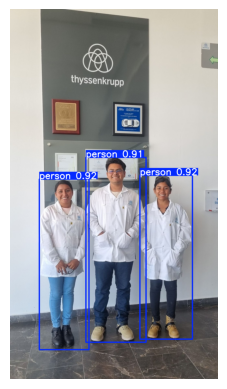

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # Automatically downloads the model if not found

# Load image
image = cv2.imread("img_1.png")

# Perform detection (only for "person" class)
results = model.predict(image, classes=[0], conf=0.5)  # Class 0 = "person" in COCO

# Plot results
annotated_image = results[0].plot()  # Draws bounding boxes and labels

# Display with Matplotlib
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()